In [1]:
# 필요한 라이브러리 호출
import pandas as pd
import folium
import json

In [2]:
# 파일 불러오기
a=pd.read_csv('./원본데이터/추가_전국전동휠체어급속충전기표준데이터.csv',encoding='euc-kr')
a

,시설명,시도명,시군구명,시군구코드,소재지도로명주소,소재지지번주소,위도,경도,설치장소설명,평일운영시작시각,...,공휴일운영시작시각,공휴일운영종료시각,동시사용가능대수,공기주입가능여부,휴대전화충전가능여부,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명
0,용산행복장애인자립생활센터,서울특별시,용산구,11170,서울특별시 용산구 원효로89길 31,NaN,37.540745,126.967358,센터 1층,09:00,...,00:00,00:00,2,Y,Y,용산행복장애인자립생활센터,02-704-0420,2021-09-15,3020000,서울특별시 용산구
1,간석3동행정복지센터,인천광역시,남동구,28200,인천광역시 남동구 용천로 186 (간석동),인천광역시 남동구 간석동 49-1,37.466111,126.714686,행정복지센터,09:00,...,00:00,00:00,2,Y,Y,인천광역시 남동구,032-453-2572,2022-03-04,3530000,인천광역시 남동구
2,간석4동행정복지센터,인천광역시,남동구,28200,인천광역시 남동구 석정로 575 (간석동),인천광역시 남동구 간석동 612-1,37.467324,126.699152,행정복지센터,09:00,...,00:00,00:00,2,Y,Y,인천광역시 남동구,032-453-2572,2022-03-04,3530000,인천광역시 남동구
3,만수2동행정복지센터,인천광역시,남동구,28200,인천광역시 남동구 만수서로 46 (만수동),인천광역시 남동구 만수동 1116-2,37.461387,126.731157,행정복지센터,09:00,...,00:00,00:00,2,Y,Y,인천광역시 남동구,032-453-2572,2022-03-04,3530000,인천광역시 남동구
4,장수서창동행정복지센터,인천광역시,남동구,28200,인천광역시 남동구 독곡로 28 (장수서창동),인천광역시 남동구 서창동 558-2,37.435880,126.747361,행정복지센터,09:00,...,00:00,00:00,2,Y,Y,인천광역시 남동구,032-453-2572,2022-03-04,3530000,인천광역시 남동구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,겸재정선미술관,서울특별시,강서구,11500,서울특별시 강서구 양천로47길 36,서울특별시 강서구 가양동 243-1,37.572223,126.838412,2층,10:00,...,10:00,17:00,2,Y,Y,겸재정선미술관,02-2659-2206,2022-02-14,3150000,서울특별시 강서구
2940,등촌3동주민센터,서울특별시,강서구,11500,서울특별시 강서구 화곡로63길 96,서울특별시 강서구 등촌동 705-4,37.558888,126.847919,1층,09:00,...,00:00,00:00,2,Y,Y,서울특별시 강서구 등촌3동주민센터,02-2600-7445,2022-02-14,3150000,서울특별시 강서구
2941,가양4종합사회복지관,서울특별시,강서구,11500,서울특별시 강서구 양천로57길 37,서울특별시 강서구 가양동 1478 가양4단지아파트,37.565932,126.852069,1층,09:00,...,00:00,00:00,2,Y,Y,가양4종합사회복지관,02-2668-6689,2022-02-14,3150000,서울특별시 강서구
2942,가양5종합사회복지관,서울특별시,강서구,11500,서울특별시 강서구 양천로 57길 36,서울특별시 강서구 가양동 1481 가양5단지아파트,37.564627,126.853520,1층,09:00,...,00:00,00:00,2,Y,Y,가양5종합사회복지관,02-2668-4603,2022-02-14,3150000,서울특별시 강서구


In [3]:
# 사용할 컬럼 조회 및 결측치 확인
a=a[['시설명','시도명','시군구명','위도','경도','동시사용가능대수']]
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시설명       2944 non-null   object 
 1   시도명       2944 non-null   object 
 2   시군구명      2944 non-null   object 
 3   위도        2944 non-null   float64
 4   경도        2943 non-null   float64
 5   동시사용가능대수  2944 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 138.1+ KB


In [4]:
a[(a['시도명']=='부산광역시')&(a['시군구명']=='강서구')]

,시설명,시도명,시군구명,위도,경도,동시사용가능대수
1667,김해공항 국내선,부산광역시,강서구,35.168270,128.946476,2
1668,김해공항 국제선,부산광역시,강서구,35.168270,128.946476,2
1669,강서구청,부산광역시,강서구,35.212203,128.980585,2
1670,부산김해경전철 덕두역,부산광역시,강서구,35.182000,128.954198,2


In [5]:
# 부산광역시 충전소만 조회
a=a[a['시도명']=='부산광역시']
a

,시설명,시도명,시군구명,위도,경도,동시사용가능대수
60,남천역,부산광역시,수영구,35.142475,129.108767,2
61,민락역,부산광역시,수영구,35.166723,129.122791,2
62,국민체육센터,부산광역시,수영구,35.152938,129.107460,2
63,장애인복지관,부산광역시,수영구,35.159371,129.104987,2
109,교대역1호선,부산광역시,연제구,35.196397,129.079330,2
...,...,...,...,...,...,...
2926,영화의전당,부산광역시,해운대구,35.171038,129.127086,1
2927,인제대학교해운대백병원,부산광역시,해운대구,35.173259,129.182163,1
2928,지체장애인협회해운대지부,부산광역시,해운대구,35.233439,129.155886,1
2929,해운대장애인복지관,부산광역시,해운대구,35.210858,129.121937,1


In [6]:
# 시군구명 조회
## '남구'에는 급속충전기가 1개도 없어 조회되지 않음
a['시군구명'].unique()

array(['수영구', '연제구', '영도구', '서구', '중구', '동구', '사하구', '기장군', '강서구', '사상구',
       '동래구', '해운대구', '부산진구', '북구', '금정구'], dtype=object)

In [7]:
# 인덱스 초기화
a1=a[['위도','경도']].reset_index(drop=True)
a1

,위도,경도
0,35.142475,129.108767
1,35.166723,129.122791
2,35.152938,129.107460
3,35.159371,129.104987
4,35.196397,129.079330
...,...,...
154,35.171038,129.127086
155,35.173259,129.182163
156,35.233439,129.155886
157,35.210858,129.121937


In [8]:
k=pd.read_csv('./원본데이터/장애유형별_장애인_성_시군구별__20220627165715.csv', encoding='euc-kr', header=1)
k

,시군구별,장애유형별,전체
0,중구,지체,1248
1,중구,시각,313
2,중구,청각,219
3,중구,언어,23
4,중구,지적,119
...,...,...,...
235,기장군,호흡기,41
236,기장군,간,32
237,기장군,안면,7
238,기장군,장루ㆍ요루,44


In [9]:
df = k[(k['장애유형별'] == '지체') | (k['장애유형별'] == '뇌병변')]
k = df.groupby('시군구별')[['전체']].sum()
k = k.reset_index()
k

,시군구별,전체
0,강서구,2767
1,금정구,6389
2,기장군,4807
3,남구,7834
4,동구,3559
5,동래구,6734
6,부산진구,11204
7,북구,9442
8,사상구,8178
9,사하구,10434


In [10]:
# 지도그리기

# 배경 맵 그리기
m=folium.Map(location=[35.229499, 129.090613], zoom_start=15, tiles='openstreetmap',control_scale=True)

# 구 단위 경계 그리기
gfile=open('./원본데이터/busan_gu.json','r',encoding='utf-8').read()
jsondata=json.loads(gfile)
folium.GeoJson(jsondata, name='municipalities').add_to(m)

# 빈도수별로 색 채우기
folium.Choropleth(
    geo_data = jsondata,
    data = k,
    columns=["시군구별", "전체"],
    fill_color = "YlGn",
    fill_opacity = 0.7,
    line_opacity = 0.7,
    key_on = "properties.name"
).add_to(m)

# 부산시내 급속충전기 마커 찍기
for i in range(len(a1)):     
    x=a1.iloc[i,0]
    y=a1.iloc[i,1]
    folium.CircleMarker(location=[x,y],color='red',fill_color='black',
                    fill_opacity=0.7,weight=1.5,radius=5).add_to(m)


m

### 전국 급속충전기 위치에 이어 우리가 거주하고 있는 부산 지역을 대상으로 상세한 탐색

In [11]:
## 분석
# 1. 전체적으로 지하철역 부근에 가장 많이 분포, 그 외에는 장애인복지관 등 장애인편의시설에 많음.
# 2. 남구의 경우 급속충전기가 단 1대도 설치되어 있지 않음.
# 3. 강서구의 경우 공항, 구청, 지하철역 등 단 4곳에만 설치되어 있어 취약함.

# 부산 단위(구)별로 충전기 1대당 수용해야하는 인원수

In [12]:
df_batt = a.groupby('시군구명')[['동시사용가능대수']].sum()
df_batt = df_batt.reset_index()
df_batt

,시군구명,동시사용가능대수
0,강서구,8
1,금정구,7
2,기장군,19
3,동구,20
4,동래구,22
5,부산진구,24
6,북구,9
7,사상구,22
8,사하구,18
9,서구,16


In [14]:
df_result = pd.merge(left=k, right=df_batt, left_on='시군구별', right_on='시군구명')
df_result['구별 보유수'] = df_result['전체'] * 0.067
df_result['1대당 수용인원'] = round(df_result['구별 보유수'] / df_result['동시사용가능대수'])
df_result = df_result[['시군구명','전체', '구별 보유수','동시사용가능대수', '1대당 수용인원']]
df_result

,시군구명,전체,구별 보유수,동시사용가능대수,1대당 수용인원
0,강서구,2767,185.389,8,23.0
1,금정구,6389,428.063,7,61.0
2,기장군,4807,322.069,19,17.0
3,동구,3559,238.453,20,12.0
4,동래구,6734,451.178,22,21.0
5,부산진구,11204,750.668,24,31.0
6,북구,9442,632.614,9,70.0
7,사상구,8178,547.926,22,25.0
8,사하구,10434,699.078,18,39.0
9,서구,3701,247.967,16,15.0


In [53]:
import geopandas
geo_df = geopandas.read_file('./원본데이터/busan_gu.json')

C:\Users\admin\AppData\Local\Temp\ipykernel_11568\1246132333.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


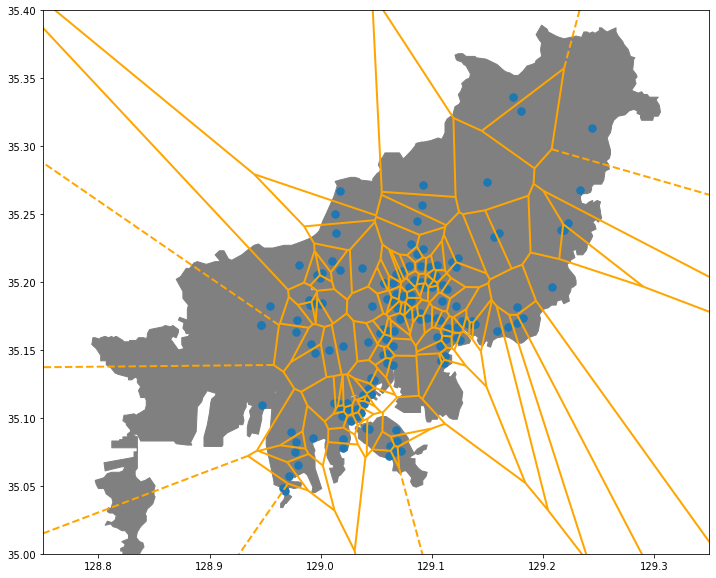

In [74]:
geo_mg = pd.merge(geo_df,df_result, how = 'left', left_on = 'name', right_on = '시군구명')

fig, ax = plt.subplots(1,1, figsize = (16 , 10))

vor = Voronoi(a1[['경도','위도']])
voronoi_plot_2d(vor, ax = ax, line_colors = 'orange', show_vertices=False, line_width=2, point_size = 15)
ax.scatter(x = a1['경도'], y = a1['위도'], c = 'r')
geo_mg.plot(ax = ax, edgecolor='grey', color = 'grey')
plt.xlim(128.75, 129.35)
plt.ylim(35, 35.4)
fig.show()